In [1]:
# import library
import pandas as pd
import numpy as np

In [28]:
# import data
data = pd.read_csv('survey1.csv')

In [29]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [31]:
# summary statistics
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [32]:
# check for missing value
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [33]:
# check for categories
data.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [34]:
data.drop(['comments','state','Country','Timestamp'],axis=1, inplace=True)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [37]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [38]:
data['self_employed'].fillna('NO',inplace=True)

In [39]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [40]:
data['work_interfere'].fillna('N/A',inplace=True)

<AxesSubplot:>

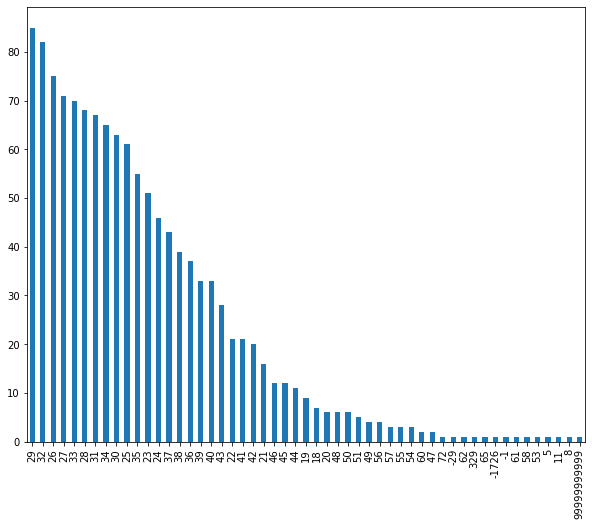

In [41]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [42]:
data.drop(data[(data['Age']>60) | (data['Age']<18)].index, inplace=True)

<AxesSubplot:>

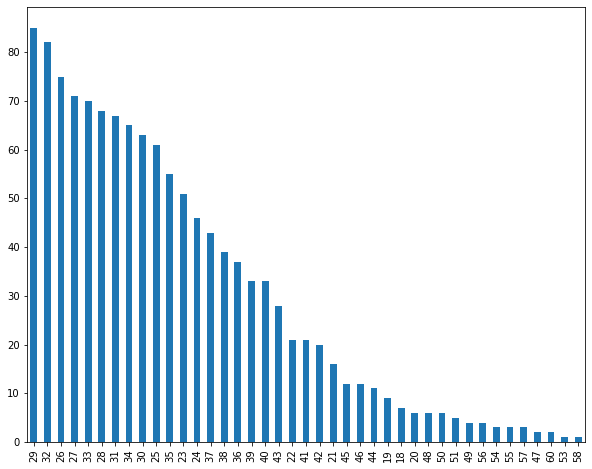

In [43]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

<AxesSubplot:>

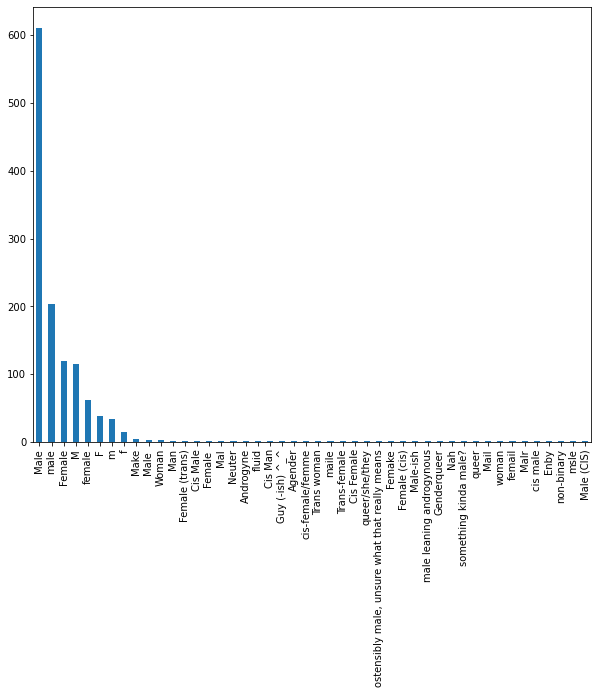

In [44]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

<AxesSubplot:>

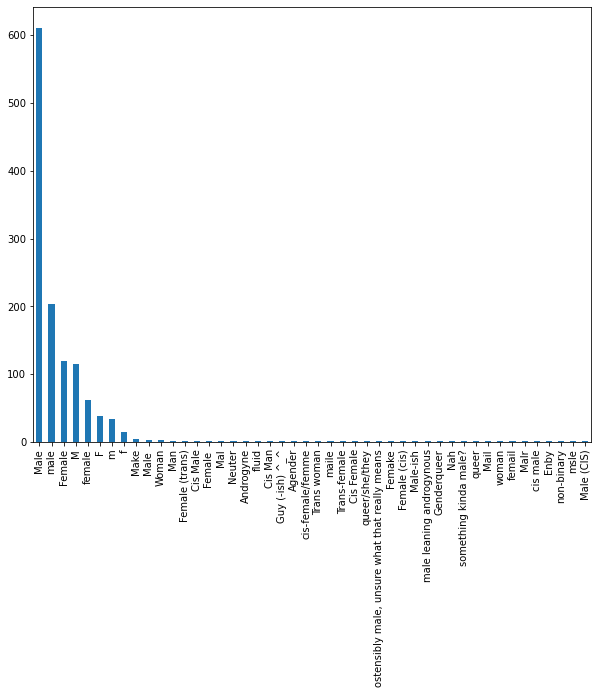

In [45]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [46]:
data['Gender'].replace(['Cis Male','cis male','Cis Man','M','m','Man','mal',
                        'Mail','maile','Make','Mal','Male','male','Male(CIS)','Male (CIS)','Male-ish','msle','Malr'],'Male',inplace=True)

In [47]:
data['Gender'].replace(['Female','female','F','f','Woman','cis-female/femme','Femake','Female (cis)','woman','femail','Female'],'Female',inplace=True)

In [48]:
data['Gender'].replace(['Agender','All','Androgyne','Enby','Female (trans)',
                        'Female (trans)','fluid','Genderqueer',
                        'Guy (-ish) ^_^','male leaning androgynous','Nah','Neuter','non-binary',
                        'ostensibly male, unsure what that really means','p','queer','queer/she/they','something kinda male?',
                        'Trans woman','Trans-female'],'Other',inplace=True)

In [49]:
from sklearn. compose import ColumnTransformer
from sklearn. preprocessing import LabelEncoder, OrdinalEncoder

In [50]:
x=data.drop('treatment', axis=1)
y=data['treatment']
data['treatment'].value_counts()

Yes    630
No     617
Name: treatment, dtype: int64

In [51]:
data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [52]:
ct=ColumnTransformer([('oe',OrdinalEncoder(),['Age', 'Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'])],remainder='passthrough')

In [53]:
x=ct.fit_transform(x)

In [54]:
le=LabelEncoder()
y=le.fit_transform(y)

In [55]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [56]:
# split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3,random_state=49)

In [57]:
# verify shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

In [58]:
from sklearn. linear_model import LogisticRegression
from sklearn. tree import DecisionTreeClassifier
from sklearn. neighbors import KNeighborsClassifier
from sklearn. ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn. metrics import accuracy_score, confusion_matrix, classification_report,auc


In [59]:
model_dict = {}

model_dict['Logistic regression']=  LogisticRegression(solver='liblinear',random_state=49)
model_dict['KNN Classifier']= KNeighborsClassifier()
model_dict['Decision Tree Classifier']= DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier']= RandomForestClassifier(random_state=49)
model_dict['Ada Boost Classifier']= AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier']= GradientBoostingClassifier(random_state=49)

In [60]:
def model_test(x_train, x_test, y_train, y_test, model, model_name ):
    model.fit (x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    
    print('""""""""""""""""""""""""""""""""""""""""{}""""""""""""""""""""""""""""""""""'.format(model_name))
    print('Score is :{}'.format(accuracy))
    print()

In [61]:
for model_name,model in model_dict.items():
    model_test(x_train, x_test, y_train, y_test, model, model_name)

""""""""""""""""""""""""""""""""""""""""Logistic regression""""""""""""""""""""""""""""""""""
Score is :0.848

""""""""""""""""""""""""""""""""""""""""KNN Classifier""""""""""""""""""""""""""""""""""
Score is :0.776

""""""""""""""""""""""""""""""""""""""""Decision Tree Classifier""""""""""""""""""""""""""""""""""
Score is :0.7946666666666666

""""""""""""""""""""""""""""""""""""""""Random Forest Classifier""""""""""""""""""""""""""""""""""
Score is :0.8346666666666667

""""""""""""""""""""""""""""""""""""""""Ada Boost Classifier""""""""""""""""""""""""""""""""""
Score is :0.864

""""""""""""""""""""""""""""""""""""""""Gradient Boosting Classifier""""""""""""""""""""""""""""""""""
Score is :0.8373333333333334



In [62]:
abc =AdaBoostClassifier(random_state=99)
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print('Accuracy of AdaBoost=',accuracy_score(y_test, pred_abc))

Accuracy of AdaBoost= 0.864


In [63]:
from sklearn.model_selection import RandomizedSearchCV
params_abc = {'n_estimators': [int(x) for x  in np.linspace(start = 1, stop =50, num = 15)],
             'learning_rate':[(0.97 + x / 100) for x in range(0, 8)]
             }
abc_random = RandomizedSearchCV(random_state=49, estimator=abc, param_distributions = params_abc, n_iter=50, cv=5,n_jobs=-1)

In [64]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [65]:
abc_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [66]:
abc_random.best_params_

{'n_estimators': 11, 'learning_rate': 1.02}

In [67]:
abc_tuned =AdaBoostClassifier(random_state=49,n_estimators=11, learning_rate=1.02)
abc_tuned.fit(x_train,y_train)
pred_abc_tuned=abc_tuned.predict(x_test)
print('Accuracy of AdaBoost(tuned)=',accuracy_score(y_test, pred_abc_tuned))

Accuracy of AdaBoost(tuned)= 0.8693333333333333


In [68]:

import seaborn as sb

Text(33.0, 0.5, 'Actual')

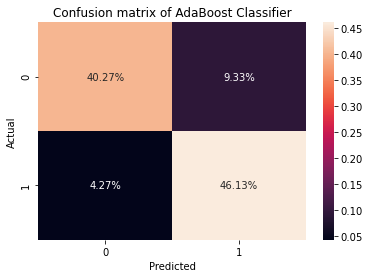

In [69]:
cf_matrix = confusion_matrix(y_test, pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [70]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       186
           1       0.84      0.91      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [71]:
import pickle 
pickle.dump('abc_tuned',open('model.pkl','wb'))